In [49]:
!pip install scikit-learn pandas numpy matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Engineered By Afan Shaikh Git: github.com/afan4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [44]:

# Load data
df = pd.read_csv('uber.csv')

# Basic cleaning
df = df.dropna(subset=['fare_amount', 'pickup_longitude', 'pickup_latitude',
                       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_datetime'])
df = df[df['fare_amount'] > 0]

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df = df.drop(columns=['pickup_datetime'])
# Features
features = ['pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'month', 'day']
X = df[features]
y = df['fare_amount']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Number of outliers: 17155


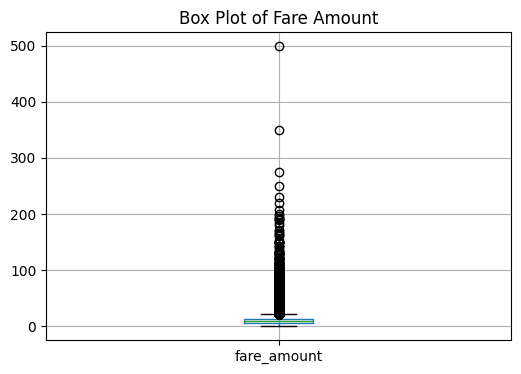

6.0
12.5


In [45]:

# --- Outliers using your exact syntax ---
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# --- Box plot ---
plt.figure(figsize=(6, 4))
df.boxplot(column='fare_amount')
plt.title('Box Plot of Fare Amount')
plt.show()
print(Q1)
print(Q3)


In [46]:
# --- Correlation matrix ---
corr_matrix = df[features + ['fare_amount']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix.round(4))


Correlation Matrix:
                   pickup_longitude  pickup_latitude  dropoff_longitude  \
pickup_longitude             1.0000          -0.8164             0.8331   
pickup_latitude             -0.8164           1.0000            -0.7749   
dropoff_longitude            0.8331          -0.7749             1.0000   
dropoff_latitude            -0.8464           0.7024            -0.9170   
passenger_count             -0.0005          -0.0015            -0.0001   
hour                         0.0025          -0.0038             0.0035   
month                       -0.0046           0.0046            -0.0035   
day                          0.0008          -0.0024            -0.0000   
fare_amount                  0.0105          -0.0085             0.0092   

                   dropoff_latitude  passenger_count    hour   month     day  \
pickup_longitude            -0.8464          -0.0005  0.0025 -0.0046  0.0008   
pickup_latitude              0.7024          -0.0015 -0.0038  0.0046

In [47]:
# --- Models ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
print(f"\nLinear Regression -> R²: {r2_lr:.4f}, RMSE: {rmse_lr:.4f}")



Linear Regression -> R²: 0.0013, RMSE: 9.6367


In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print(f"Random Forest     -> R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")

Random Forest     -> R²: 0.7770, RMSE: 4.5534
